In [1]:
!pip install yfinance
# Import necessary libraries
import yfinance as yf              # For downloading stock data
import pandas as pd                # For data handling
import matplotlib.pyplot as plt    # For plotting graphs
import seaborn as sns              # For better-looking graphs
# Download Apple's stock data from Yahoo Finance
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
# Show the first 5 rows of the data
print(data.head())


/tmp/ipython-input-97406388.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.426830  40.436220  39.722775  39.933994  102223600
2018-01-03  40.419785  40.964255  40.356422  40.490191  118071600
2018-01-04  40.607533  40.710794  40.384583  40.492536   89738400
2018-01-05  41.069866  41.156698  40.612231  40.703758   94640000
2018-01-08  40.917316  41.213018  40.818746  40.917316   82271200


In [2]:
print("Shape of the dataset:", data.shape)
# See summary statistics (min, max, average, etc.)
print(data.describe())


Shape of the dataset: (1259, 5)
Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean      95.577555    96.674710    94.396075    95.514916  1.168806e+08
std       46.078719    46.659724    45.461319    46.070755  5.504461e+07
min       33.870842    34.711717    33.825582    34.297233  3.519590e+07
25%       48.875160    49.263401    48.444869    48.882722  8.014245e+07
50%       89.073112    90.373255    88.370797    88.730458  1.023002e+08
75%      140.349060   141.756223   138.611465   140.385120  1.372052e+08
max      178.645645   179.558442   175.809046   179.254175  4.265100e+08


In [3]:
data.isnull().sum()


,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [4]:
data['Next_Close'] = data['Close'].shift(-1)
data = data[:-1]
print(data[['Close', 'Next_Close']].head())


Price           Close Next_Close
Ticker           AAPL           
Date                            
2018-01-02  40.426830  40.419785
2018-01-03  40.419785  40.607533
2018-01-04  40.607533  41.069866
2018-01-05  41.069866  40.917316
2018-01-08  40.917316  40.912621


In [5]:
X = data[['Close']]
y = data['Next_Close']


In [6]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [7]:
from sklearn.linear_model import LinearRegression
# Create the model
model = LinearRegression()
# Train (fit) the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2.6301095145580105
Mean Squared Error (MSE): 11.400883114641124
Root Mean Squared Error (RMSE): 3.3765193786858565


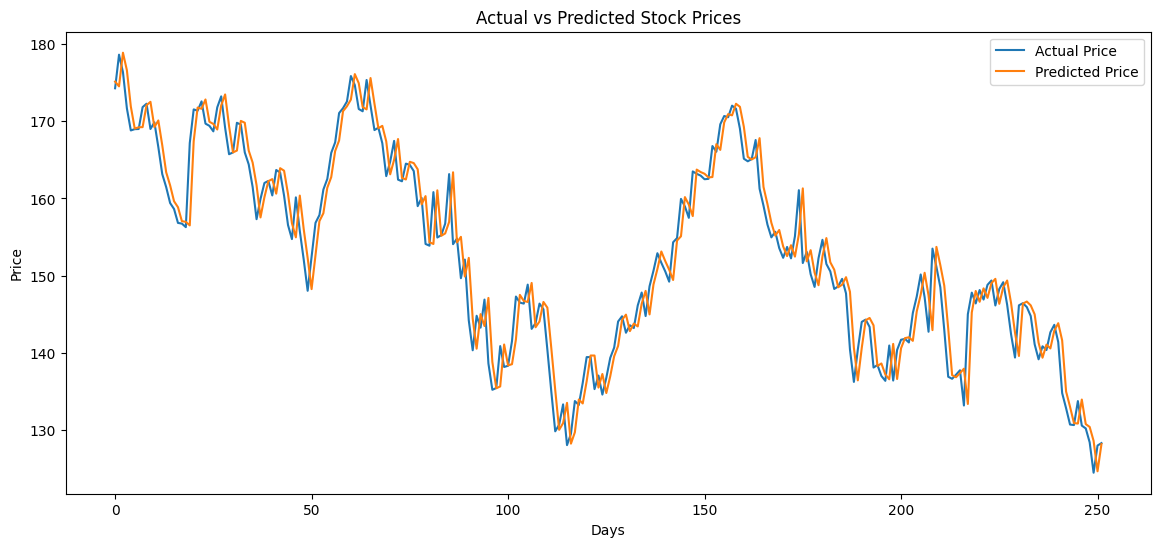

In [10]:
# Compare actual vs predicted
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),  # Hidden layer with 64 neurons
    Dense(64, activation='relu'),                    # Another hidden layer
    Dense(1)                                         # Output layer (1 value: predicted price)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
nn_model.compile(
    optimizer='adam',                # Optimizer that adjusts weights
    loss='mean_squared_error',       # What the model should minimize
    metrics=['mae']                  # Monitor Mean Absolute Error
)


In [13]:
# Train the model
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,                       # Number of passes through the data
    batch_size=32,                   # How many samples per training step
    verbose=1                        # Show training progress
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 4171.6187 - mae: 55.9741 - val_loss: 317.3002 - val_mae: 17.4682
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 36.4658 - mae: 4.7678 - val_loss: 28.1894 - val_mae: 4.4680
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9053 - mae: 1.3930 - val_loss: 11.4064 - val_mae: 2.6409
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9610 - mae: 1.1217 - val_loss: 11.3302 - val_mae: 2.6197
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.3683 - mae: 1.1881 - val_loss: 11.2857 - val_mae: 2.6132
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7107 - mae: 1.1090 - val_loss: 11.2786 - val_mae: 2.6121
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9377 - mae: 1.1413 - val_loss: 11.1933 - val_mae: 2.5967
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4545 - mae: 1.2451 - val_loss: 11.2612 - val_mae: 2.6094
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step -

In [14]:
nn_predictions = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

print("Neural Network MAE:", nn_mae)
print("Neural Network RMSE:", nn_rmse)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Neural Network MAE: 2.5999939933655756
Neural Network RMSE: 3.3480491557495


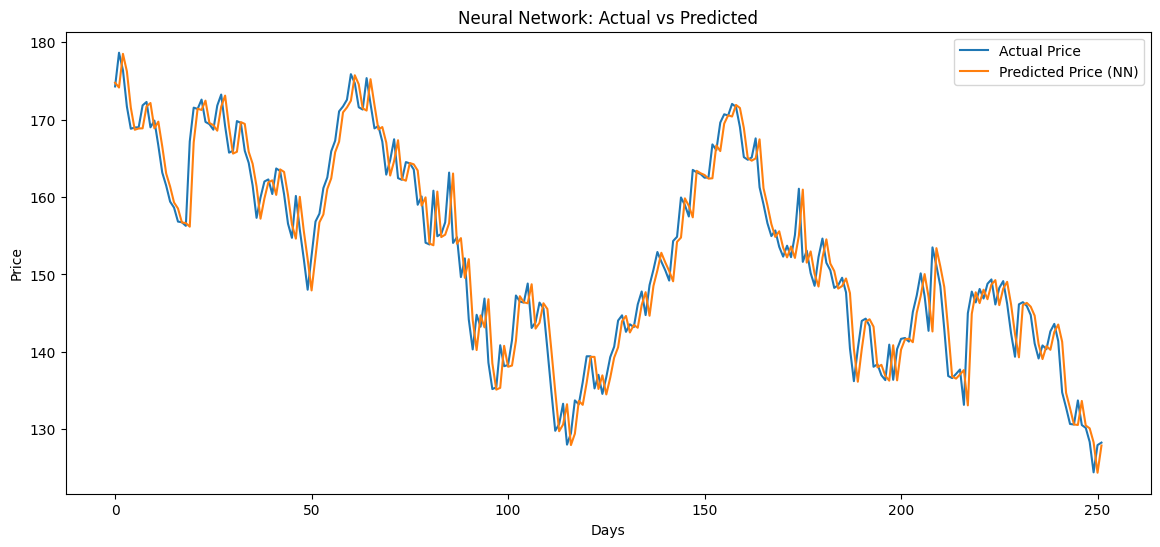

In [15]:
# Plot actual vs predicted from the neural network
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(nn_predictions, label='Predicted Price (NN)')
plt.title('Neural Network: Actual vs Predicted')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [16]:
nn_model.save('stock_price_model.h5')


In [17]:
nn_model.save('stock_price_model.keras')
print("Model saved successfully in .keras format!")


Model saved successfully in .keras format!


In [18]:
import numpy as np
from tensorflow import keras
model = keras.models.load_model('stock_price_model.keras')
# Define prediction function
def predict_price(past_prices):
    try:
        input_data = np.array(past_prices).reshape(1, -1, 1)
        prediction = model.predict(input_data)
        return float(prediction[0][0])
    except Exception as e:
        return f"Error: {str(e)}"


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [19]:
# 1. Install required packages
!pip install yfinance gradio
# 2. Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import gradio as gr
# 3. Load data
data = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
close_prices = data['Close'].values.reshape(-1, 1)
# 4. Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)
# 5. Create dataset with 10 timesteps as input
X = []
y = []
for i in range(10, len(scaled_data)):
    X.append(scaled_data[i-10:i, 0])  # past 10 days
    y.append(scaled_data[i, 0])       # next day
X = np.array(X)
y = np.array(y)
# 6. Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# 7. Define model (Dense network, input_shape=(10,))
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# 8. Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
# 9. Save the model and scaler
model.save("stock_price_model.keras")
import joblib
joblib.dump(scaler, "scaler.save")
# 10. Gradio interface
from tensorflow import keras
model = keras.models.load_model("stock_price_model.keras")
scaler = joblib.load("scaler.save")
def predict_next_price(prices_str):
    try:
        prices = [float(p.strip()) for p in prices_str.split(",")]
        if len(prices) != 10:
            return "Please enter exactly 10 prices."
        prices_scaled = scaler.transform(np.array(prices).reshape(-1, 1)).reshape(1, 10)
        prediction_scaled = model.predict(prices_scaled)
        prediction = scaler.inverse_transform([[prediction_scaled[0][0]]])[0][0]
        return f"Predicted Next Closing Price: ${prediction:.2f}"
    except Exception as e:
        return f"Error: {str(e)}"
iface = gr.Interface(
    fn=predict_next_price,
    inputs=gr.Textbox(lines=2, placeholder="Enter 10 closing prices, comma-separated"),
    outputs="text",
    title="Apple Stock Price Predictor",
    description="Enter the last 10 Apple (AAPL) closing prices to predict the next day's price."
)
iface.launch()


/tmp/ipython-input-1227025382.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0212 - mae: 0.0986 - val_loss: 0.0064 - val_mae: 0.0697
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3985e-04 - mae: 0.0206 - val_loss: 0.0018 - val_mae: 0.0364
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9014e-04 - mae: 0.0135 - val_loss: 0.0017 - val_mae: 0.0343
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.0726e-04 - mae: 0.0138 - val_loss: 0.0017 - val_mae: 0.0342
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4417e-04 - mae: 0.0128 - val_loss: 0.0012 - val_mae: 0.0283
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2085e-04 - mae: 0.0126 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.5342e-04 - mae: 0.0130 - val_loss: 9.3932e-04 - val_mae: 0.0254
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1205e-04 - mae: 0.0120 - val_loss: 0.0010 - val_mae: 0.0261
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 